### 신경망 모델에서 옵티마이저 사용법

- 이진분류 : 유방dka 예측 사례


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()
cancer_std = StandardScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify = cancer.target, test_size = 0.2, random_state = 2022
)

#### 1. Adam optimizer

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential([
            Dense(100, input_dim = 30, activation = "relu"),
            Dense(24, activation = "relu"),
            Dense(1, activation = "sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


#### Adam 하이퍼 파라메터
- learning_rate: 0보다 크거나 같은 float 값. 학습률.
- beta_1: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- beta_2: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.
- amsgrad: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정합니다


In [8]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999,
            epsilon = None, decay = 0.0, amsgrad = False)


In [9]:
model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ["accuracy"])

In [10]:
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs = 100, batch_size = 100, verbose = 0)

In [11]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0723 - accuracy: 0.9825


[0.07229863852262497, 0.9824561476707458]

In [32]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1,len(y_acc)+1)

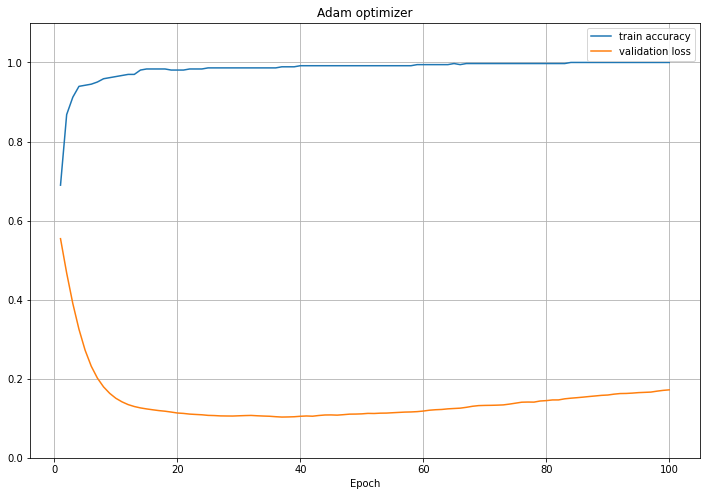

In [33]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')
plt.show()

#### 2. RMSprop Optimizer

In [13]:
model2 = Sequential([
            Dense(100, input_dim = 30, activation = "relu"),
            Dense(24, activation = "relu"),
            Dense(1, activation = "sigmoid")
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               3100      
                                                                 
 dense_7 (Dense)             (None, 24)                2424      
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


#### RMSprop 하이퍼 파라메터
- lr: 0보다 크거나 같은 float 값. 학습률.
- rho: 0보다 크거나 같은 float 값.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.


In [19]:
from tensorflow.keras.optimizers import RMSprop
rms = RMSprop(learning_rate = 0.001, rho = 0.9, epsilon = None, decay = 0.0)

In [20]:
model2.compile(rms,"binary_crossentropy", ["accuracy"])

In [ ]:
hist2 = model2.fit(X_train, y_train, validation_split = 0.2,
                   epochs = 100, batch_size = 100, verbose = 2)

In [23]:
model2.evaluate(X_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.2750 - accuracy: 0.9649


[0.2750289738178253, 0.9649122953414917]

In [34]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs = np.arange(1,len(y_acc2)+1)

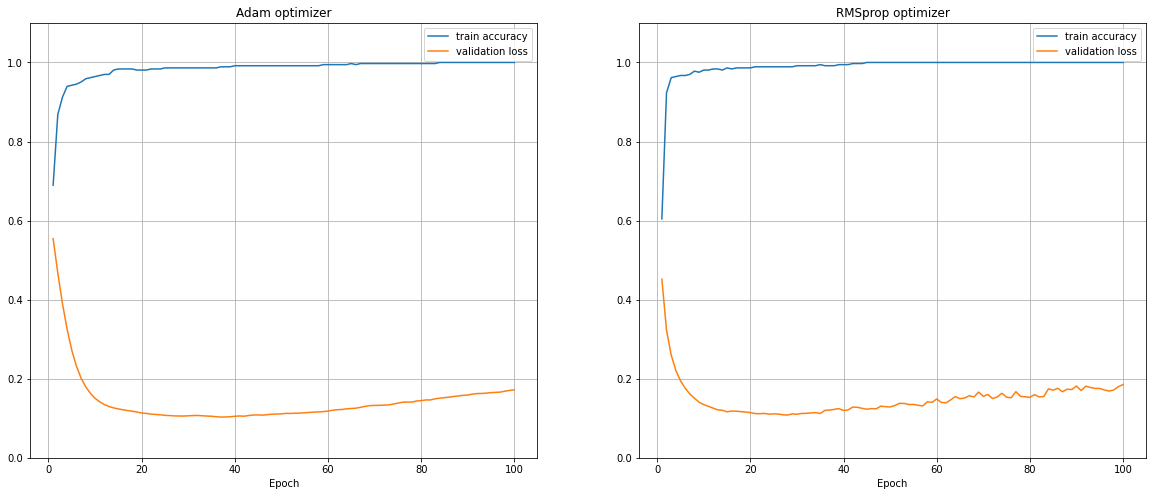

In [35]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')

plt.subplot(122)
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('RMSprop optimizer')
plt.show()